# Spaceship Titanic
Predict which passengers are transported to an alternate dimension

In [14]:
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np
import random
import os
import warnings
warnings.filterwarnings("ignore")

**1. EDA**

1) train, test set의 자료 구조와 자료형 확인 (pandas 활용)

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.csv')

In [4]:
train.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
train.shape

(8693, 14)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
test.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [8]:
test.shape

(4277, 13)

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [10]:
sample.head(5)

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [11]:
sample.shape

(4277, 2)

In [12]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  4277 non-null   object
 1   Transported  4277 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 37.7+ KB


데이터를 확인해본 결과, `PassengerId`, `HomePlanet`, `CryoSleep`, `Cabin`, `Destination`, `VIP`, `Name`, `Transported` 변수는 범주형 데이터이고, 나머지 `Age`, `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck` 변수는 수치형 데이터이이다. 



*   `PassengerId`는 숫자로 구성되어 있지만 전부 고유값으로 `Name`과 같은 역할을 하는 범주형 자료로 보았고, `HomePlanet`과 `Destination`은 각각 3개의 고유값을 갖는 변수이다. 
*   `CryoSleep`, `VIP`는 True/False 값을 갖는 boolean이다. 
*   `Age`는 승객의 나이로 정수값을 갖기에 수치형 자료이며, `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck`은 각 서비스에 이용한 금액으로 역시 수치형 데이터이다. 





2) 결측치 확인 및 결측치 시각화 (missingno 활용)


In [15]:
train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [16]:
test.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64



*   missingno는 결측데이터들을 파악하는데 직관적인 도움을 주는 패키지이다. 시각화를 매트릭스와 바 차트 형태로 표현해줄 수 있다.
*   Matrix: 데이터셋에 대한 결측치를 매트릭스로 시각화 해준다. 매트릭스가 출력되는데 흰색으로 표현된 빈칸들이 결측치이다.
*   Bar Chart: 데이터셋에 대한 결측치를 바 형태의 차트로 시각화 해준다.Bar chart로 확인하면 수치적으로도 편하게 볼 수있다. 
*   출처: https://hong-yp-ml-records.tistory.com/14



***Train 결측치 매트릭스 시각화***

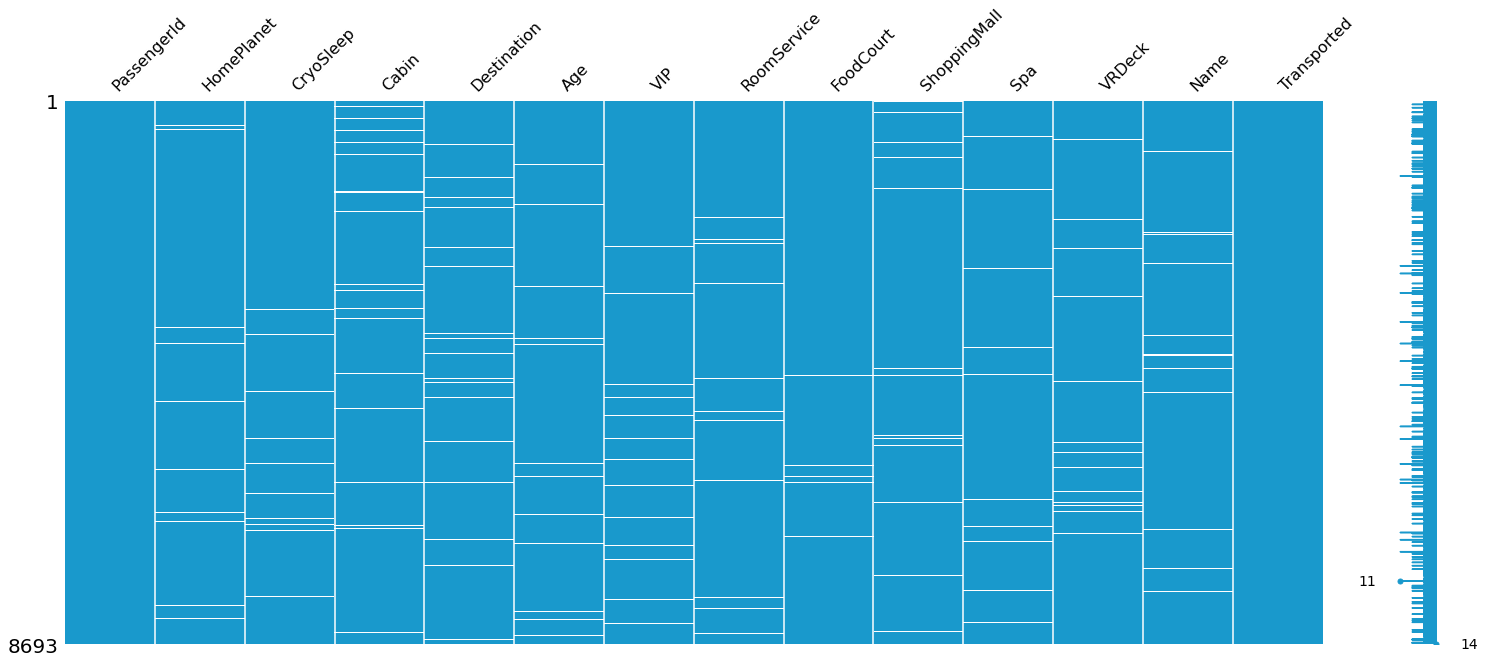

In [17]:
msno.matrix(df=train.iloc[:, :], color=(0.1, 0.6, 0.8))

***Test 결측치 바차트 시각화화***

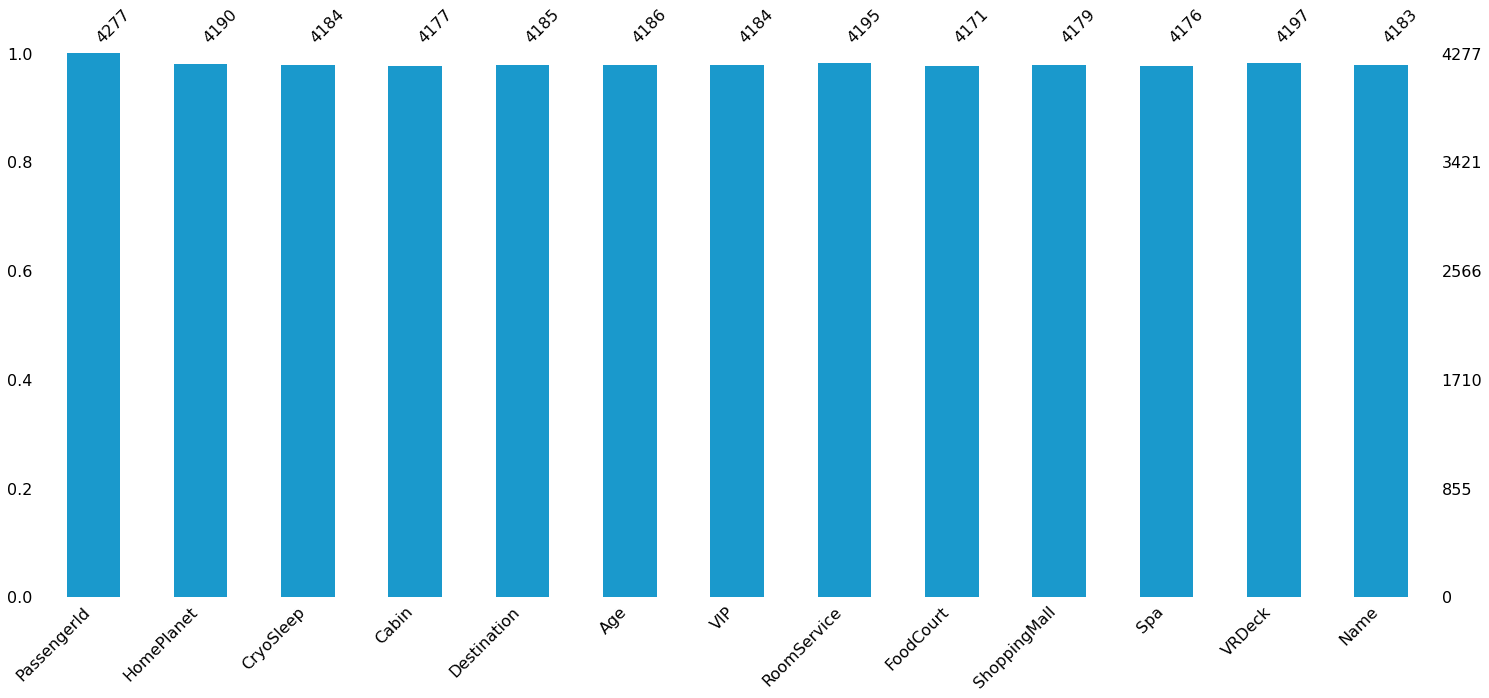

In [18]:
msno.bar(df=test.iloc[:, :], color=(0.1, 0.6, 0.8))

3) 자료형 (data type) 별 변수 시각화 (matplotlib, pandas 활용)

***전처리***

In [23]:
# Group열과 Number열을 만들어 PassengerId열의 _ 앞의 값은 Group열에, 뒤의 값은 Number열에 저장. 그후 Passengerld열은 삭제

train["Group"] = train.PassengerId.str.split("_").str[0]
train["Number"] = train.PassengerId.str.split("_").str[1]
train = train.drop("PassengerId", axis=1)

test["Group"] = test.PassengerId.str.split("_").str[0]
test["Number"] = test.PassengerId.str.split("_").str[1]
test = test.drop("PassengerId", axis=1)

In [19]:
# Cabin열의 na값을 NA/NA/NA로 채우기

train['Cabin'] = train['Cabin'].fillna('NA/NA/NA')
test['Cabin'] = test['Cabin'].fillna('NA/NA/NA')

In [20]:
# deck, num, side열을 만들어 Cabin열의 /를 기준으로 첫번째 값은 deck, 두번째 값은 num, 세번째 값은 side열에 저장. 그 후 Cabin열 삭제

train['deck'] = train['Cabin'].str.split("/").str[0]
train['num'] = train['Cabin'].str.split("/").str[1]
train['side'] = train['Cabin'].str.split("/").str[2]
train = train.drop(columns='Cabin', axis=1)

test['deck'] = test['Cabin'].str.split("/").str[0]
test['num'] = test['Cabin'].str.split("/").str[1]
test['side'] = test['Cabin'].str.split("/").str[2]
test = test.drop(columns='Cabin', axis=1)

In [21]:
# side열의 값이 S인 경우 값을 True로, 그렇지 않은 경우 False로 바꾸기

train['side'] = np.where(train['side']=="S",True,False)
test['side'] = np.where(test['side']=="S",True,False)

In [22]:
# num열의 값이 NA인 경우 값을 -1로 바꾸기

train['num'] = np.where(train['num'].isna() == True, -1, train['num'])
test['num'] = np.where(test['num'].isna() == True, -1, test['num'])

***수치형 변수 시각화***

In [24]:
sns.set_palette("pastel")

In [39]:
num = train.select_dtypes(include=['float64']).columns

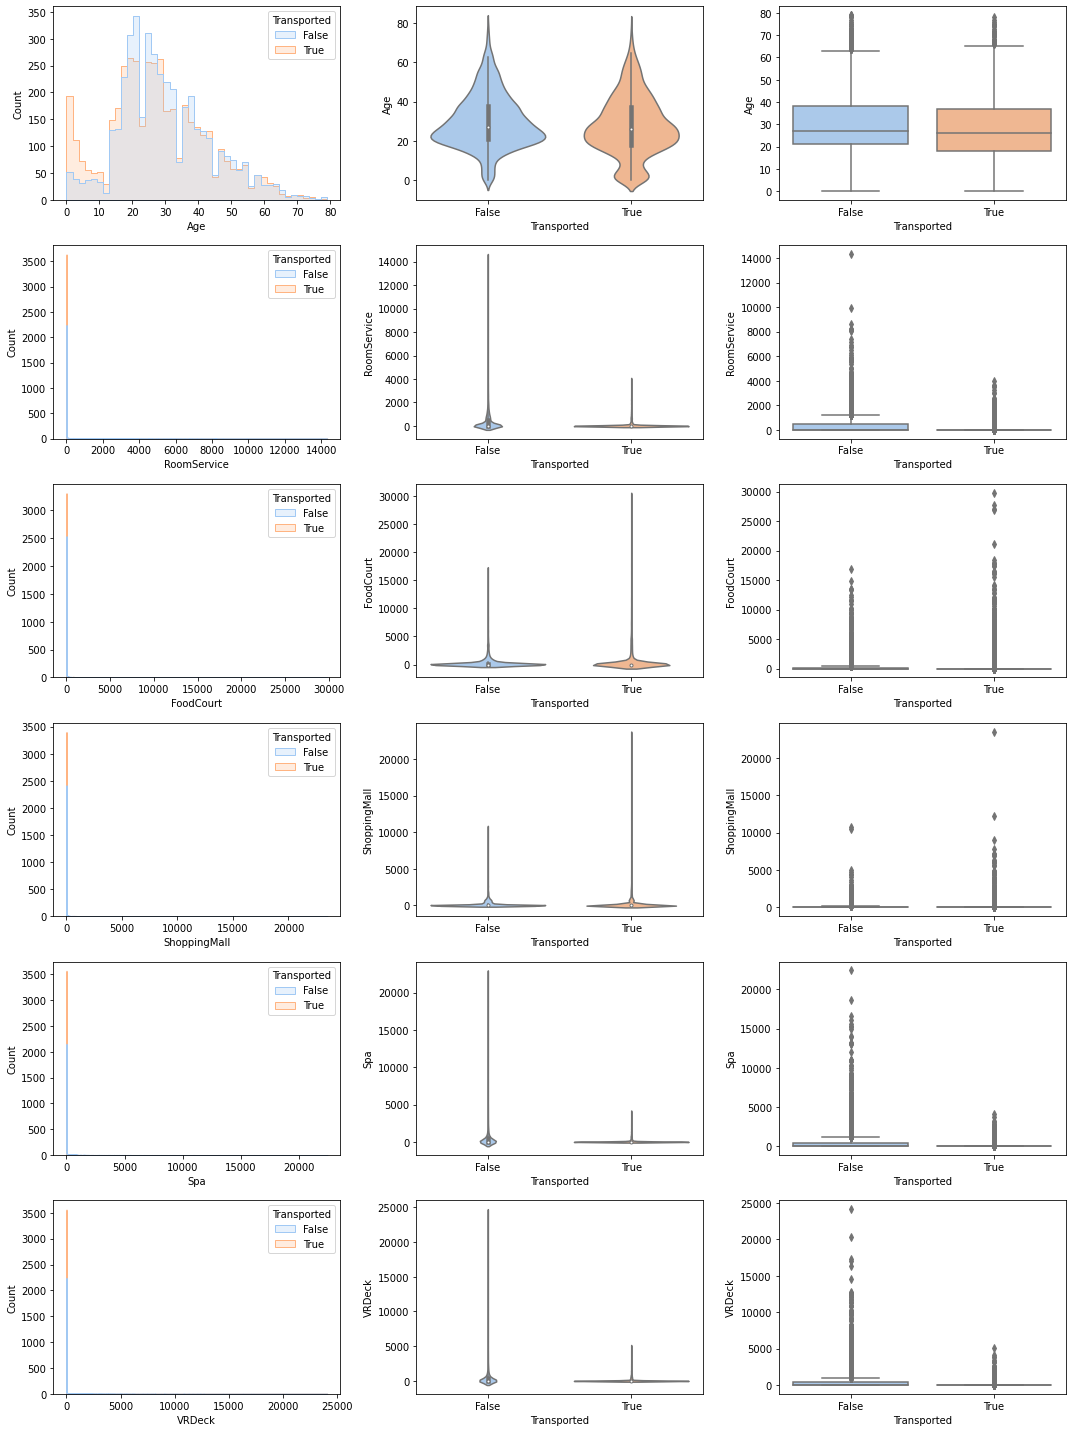

In [26]:
fig, ax = plt.subplots(6,3,figsize=(15,20))
for i, col in enumerate(num):
    sns.histplot(x=col, hue="Transported", data=train, element='step', ax=ax[i,0])
    sns.violinplot(x="Transported", y=col, data=train, ax=ax[i,1])
    sns.boxplot(x="Transported", y=col, data=train, ax=ax[i,2])
    
plt.tight_layout()



*   `Age` 변수를 그래프로 그린 결과, 0 ~ 20세에서 True인 관측치가 더 많았고,  20~ 30대에서는 False인 관측치가 조금 더 많았다. 나머지 연령대에서는 True와 False의 차이가 크지 않은 것으로 보아 특정 연령대(0 ~ 30세)를 제외하고는 `Age` 변수가 큰 영향을 주지 않음을 알 수 있다. 20 ~ 40대대 사이의 관측치가 많은 것을 볼 수 있다다.
*   나머지 5개 변수의 경우 대부분의 관측치가 0인 분포를 보인다.
*   `Transported` 이 True인 경우 `RoomService`, `Spa`, `VRDeck` 에 사용한 돈이 False에 비해 비교적 적은 경향이 있다. 또한 대체로 비슷하지만, `Transported` 이 False인 경우 `FoodCourt` 와 `ShoppingMall` 에서 사용한 돈이 비교적 적은 경향이 있다.
*   `Age` 변수의 영향을 많이 받는 0 ~ 20세의 데이터를 제거한 후 그래프를 다시 그린다면 나머지 5개 변수의 영향력을 더 잘 파악할 수 있을 것 같다고 생각한다.







***범주형 변수 시각화***

In [29]:
cat = train.select_dtypes(include=['object', 'bool']).columns
cat = cat.drop("Name").drop("Number").drop("num").drop("Transported")
cat = np.append(cat, "Transported")
cat

array(['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'deck', 'side',
       'Group', 'Transported'], dtype=object)

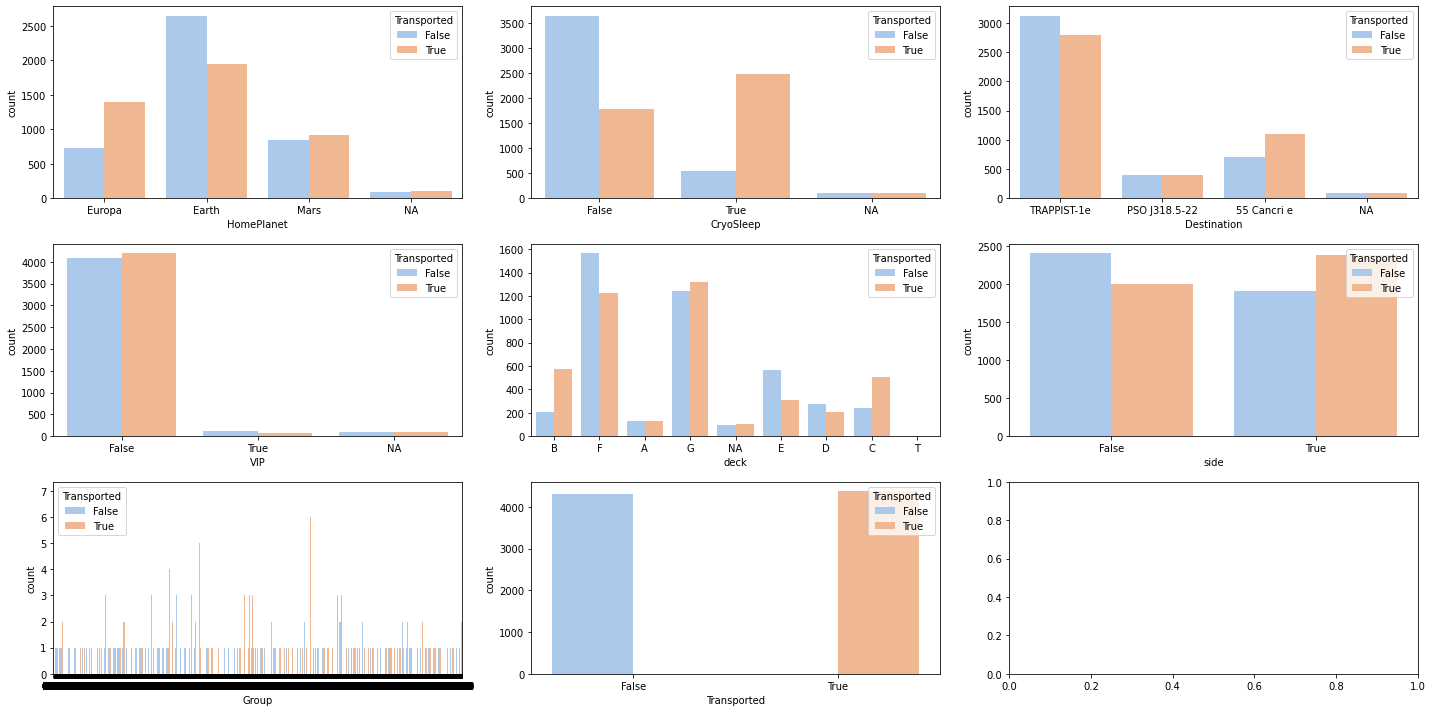

In [32]:
train_plot = train.copy()
fig, ax = plt.subplots(3,3,figsize=(20,10))
for i, col in enumerate(cat):
    train_plot[col] = train_plot[col].fillna("NA")
    sns.countplot(data=train_plot, x=col, hue="Transported", ax=ax[i//3,i%3])
    
plt.tight_layout()



*   `HomePlanet`: Europa는 True, Earth는 False가 더 많은 경향이 있고, Mars는 True와 False의 비율이 비슷하다.
*   `CryoSleep`: True인 경우 높은 확률로 Transported가 True였고, False인 경우 Transported가 False인 경우가 더 많았다.
*   `Destination`, `VIP`, `side`: Transported에 유의미한 영향을 미치지 않는 것으로 보인다. 
*   `Group`, `deck`: 파악이 어려우나 큰 관계가 없어보인다. 





4) 결측치 보간

*참고: [https://dining-developer.tistory.com/19](https://dining-developer.tistory.com/19)*

***수치형 변수 결측치 보간***

In [35]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [40]:
for col in num.drop("Age"):
    print(col,"가(이) 0인 비율: ", ((train[col]==0).sum())/len(train))
    print(col," NA 비율: ", ((train[col].isna()).sum())/len(train))

RoomService 가(이) 0인 비율:  0.6415506729552514
RoomService  NA 비율:  0.02082135051190613
FoodCourt 가(이) 0인 비율:  0.6276314275854136
FoodCourt  NA 비율:  0.021051420683308408
ShoppingMall 가(이) 0인 비율:  0.6427010238122628
ShoppingMall  NA 비율:  0.02392729782583688
Spa 가(이) 0인 비율:  0.6124467962728632
Spa  NA 비율:  0.021051420683308408
VRDeck 가(이) 0인 비율:  0.632117795927758
VRDeck  NA 비율:  0.021626596111814105


위 결과를 통해 `Age` 제외한 나머지 수치형 자료의 값이 대부분 0이라는 것을 알 수 있다. 

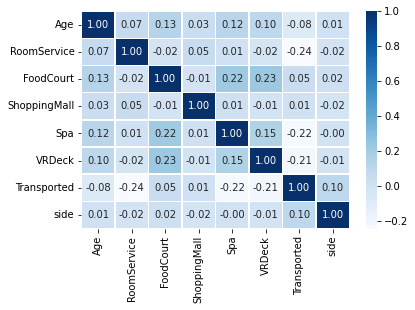

In [34]:
# 변수간 상관관계
sns.heatmap(data = train.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

Heatmap을 그려본 결과 변수간 유의한 상관관계를 발견하기 힘들었다. 

RoomService     0.0
FoodCourt       0.0
ShoppingMall    0.0
Spa             0.0
VRDeck          0.0
dtype: float64


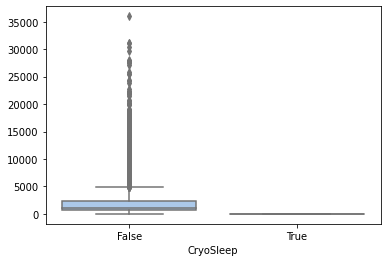

In [43]:
service = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
print(train[train["CryoSleep"]==True][service].sum())
sns.boxplot(x="CryoSleep", y=train[service].sum(axis=1), data=train)

`CryoSleep` 이 True인 경우 service에 사용한 돈이 0

RoomService     0.0
FoodCourt       0.0
ShoppingMall    0.0
Spa             0.0
VRDeck          0.0
dtype: float64


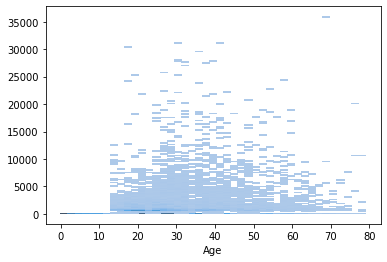

In [44]:
print(train[train["Age"]<13][service].sum())
sns.histplot(x="Age", y=train[service].sum(axis=1), data=train, element='step')

`Age` 가 13보다 작은 경우 service에 사용한 돈이 0

`CryoSleep` 이 True이거나 `Age` 가 13세 미만인 경우 모두 서비스 이용금액이 0인 것을 확인했다.따라서 `CryoSleep` 이 True이거나 `Age` 가 13세 미만인 경우 5개 변수의 결측치를 0으로 대체했다.

In [45]:
sleep_train_idx = train[train["CryoSleep"]==True].index
sleep_test_idx = test[test["CryoSleep"]==True].index

age13_train_idx = train[train["Age"]<13].index
age13_test_idx = test[test["Age"]<13].index

train.loc[sleep_train_idx.union(age13_train_idx), service] = 0.0
test.loc[sleep_test_idx.union(age13_test_idx), service] = 0.0

반대로 서비스 이용금액이 존재하는 경우, `CryoSleep` 은 False이고, 금액이 0이면 `CryoSleep` 은 True인 것을 이용해 `CryoSleep` 의 결측치를 채워줬다.

In [46]:
train["CryoSleep"] = train["CryoSleep"].fillna(train[service].sum(axis=1)==0)
test["CryoSleep"] = test["CryoSleep"].fillna(test[service].sum(axis=1)==0)

`CryoSleep`, `Age` 등 service와 확실히 관련이 있는 경우는 위와 같이 변수를 참고하여 보간했다.



*   결측값을 대체할 때는 결측치를 제거하거나 평균, 중앙값 등으로 대체하는 single imputation이 있고 오차의 불확실성을 고려하는 다중 대체법(multiple imputation)이 있다. 다중대체법은 데이터셋 생성, 분석과 추정, 결합을 통해 결측치를 대체하는 방법으로 대표적으로 MCMC를 이용하는 MVNI 방식과 FCS를 이용하는 MICE 방식이 있다.
*   MVNI는 기본적으로 모든 변수가 정규분포를 따른다고 가정하고 베이지안 접근에 따라 정규분포에서 대체값을 얻는다. MICE는 정규분포를 따른다는 가정이 없는 방식으로, 결측치의 조건적인 분포가 다른 모든 변수에 의해 결정된다는 가정 하에 대체값을 얻는다. 특히 FCS는 분포 가정 없이 연속된 회귀방정식을 통해 값을 대체하는 방식이다.
*   결측치가 존재하는 수치형 데이터인 Age 및 여러 service 변수와 다른 변수의 상관계수가 크지 않은 것을 확인했지만 위와 같이 특정 조건이 주어질 때 관계가 존재한다는 것 또한 확인했다. 따라서 다른 변수에 의해 조건적인 분포를 결정하는 MICE 방식을 통해 결측치를 대체했다.
*   참고: [https://gooopy.tistory.com/45](https://gooopy.tistory.com/45)





In [64]:
from impyute.imputation.cs import mice

In [65]:
np_imputed = mice(train[num].values)
df_imputed = pd.DataFrame(np_imputed)

train[num] = df_imputed

In [67]:
np_imputed = mice(test[num].values)
df_imputed = pd.DataFrame(np_imputed)

test[num] = df_imputed

***범주형 변수 결측치 보간***



*   **HomePlanet**






In [68]:
pd.crosstab(train['HomePlanet'],train['deck'])

deck,A,B,C,D,E,F,G,NA,T
HomePlanet,,,,,,,,,
Earth,0,0,0,0,395,1614,2498,95,0
Europa,252,766,734,186,128,0,0,61,4
Mars,0,0,0,282,330,1110,0,37,0


In [ ]:
for i in range(len(train)):
    if train['HomePlanet'].isna()[i]==True :
        if train['deck'][i] == "G" :
            train['HomePlanet'][i] = "Earth"
        if train['deck'][i] == "A" or train['deck'][i] == "B" or train['deck'][i] == "C" or train['deck'][i] == "T" :
            train['HomePlanet'][i] = "Europa"

for i in range(len(test)):
    if test['HomePlanet'].isna()[i]==True :
        if test['deck'][i] == "G" :
            test['HomePlanet'][i] = "Earth"
        if test['deck'][i] == "A" or test['deck'][i] == "B" or test['deck'][i] == "C" or test['deck'][i] == "T" :
            test['HomePlanet'][i] = "Europa"



*   `deck` 을 기준으로 결측치를 채웠다.
*   `deck` 이 A, B, C, G, T인 경우 `HomePlanet` 이 일정하므로 해당 값에 따라 NA를 채워주었다.





*   **나머지 범주형 변수**



`CryoSleep` 결측치는 수치형 변수 결측치 보간할 때 이미 대체해주었고 나머지 `HomePlanet`, `Destination`, `VIP` 변수는 다른 변수와 큰 상관관계가 없다고 판단해 각 변수의 최빈값으로 채워주었다.

In [70]:
for col in cat[:-1]:
    idx = train[(train[col].isna()==True)|(train[col]=="NA")].index
    train[col].iloc[idx] = train[col].mode()
    idx = test[(test[col].isna()==True)|(test[col]=="NA")].index
    test[col].iloc[idx] = test[col].mode()

In [71]:
idx = train[train["num"]==-1].index
train["num"].iloc[idx] = train["num"].mode()
idx = test[test["num"]==-1].index
test["num"].iloc[idx] = test["num"].mode()

In [72]:
print(train.isna().sum(), test.isna().sum())

HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
deck              0
num               0
side              0
Group             0
Number            0
dtype: int64 HomePlanet       0
CryoSleep        0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Name            94
deck             0
num              0
side             0
Group            0
Number           0
dtype: int64


5) EDA 결과를 바탕으로 파생변수 생성성



*   TotalExpense (전체 서비스 이용 금액)



In [73]:
train["TotalExpense"] = train[service].sum(axis=1)
test["TotalExpense"] = test[service].sum(axis=1)



---



**2. 모델링**

In [134]:
from sklearn.model_selection import *
from sklearn.metrics import *
import lazypredict
from lazypredict.Supervised import LazyClassifier
import time
from IPython.display import clear_output
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

Encoding


*   대표적인 인코딩 방법으로는 Label Encoding과 One-hot Encoding이 있다. Label Encoding은 n개의 범주형 데이터를 0 ~ n-1의 연속적인 수치 데이터로 바꾸는 방법이고 One-hot Encoding은 n개의 범주형 데이터를 n개의 비트 벡터로 표현하는 방법이다. 인코딩 하려는 변수인 `HomePlanet`, `Destination`, `deck`, `NewGroup` 은 모두 순서가 의미있지 않은 변수이므로 One-hot Encoding이 적합하다고 보이지만, 고유값의 개수가 많아져 선형회귀나 로지스틱 회귀를 사용할 때 다중공선성 문제가 발생할 위험이 있다.
*   참고: https://azanewta.tistory.com/46







*   One-hot Encoding


In [82]:
train_onehot = train.copy()
test_onehot = test.copy()

In [83]:
onehot_cols = ["HomePlanet", "CryoSleep", "Destination", "VIP", "deck", "side", "NewGroup"]
train_onehot = pd.get_dummies(data=train_onehot, columns=onehot_cols, prefix=onehot_cols)
test_onehot = pd.get_dummies(data=test_onehot, columns=onehot_cols, prefix=onehot_cols)

In [84]:
train_onehot = train_onehot.drop(["Name","Group","Number","num"], axis=1)
test_onehot = test_onehot.drop(["Name","Group","Number","num"], axis=1)

In [85]:
train_onehot

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,TotalExpense,HomePlanet_Earth,HomePlanet_Europa,...,side_True,NewGroup_0,NewGroup_1,NewGroup_2,NewGroup_3,NewGroup_4,NewGroup_5,NewGroup_6,NewGroup_7,NewGroup_8
0,39.0,0.0,0.0,0.0,0.0,0.0,False,0.0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,24.0,109.0,9.0,25.0,549.0,44.0,True,736.0,1,0,...,1,1,0,0,0,0,0,0,0,0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,10383.0,0,1,...,1,1,0,0,0,0,0,0,0,0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False,5176.0,0,1,...,1,1,0,0,0,0,0,0,0,0
4,16.0,303.0,70.0,151.0,565.0,2.0,True,1091.0,1,0,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,False,8536.0,0,1,...,0,0,0,0,0,0,0,0,0,1
8689,18.0,0.0,0.0,0.0,0.0,0.0,False,0.0,1,0,...,1,0,0,0,0,0,0,0,0,1
8690,26.0,0.0,0.0,1872.0,1.0,0.0,True,1873.0,1,0,...,1,0,0,0,0,0,0,0,0,1
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,False,4637.0,0,1,...,1,0,0,0,0,0,0,0,0,1


In [86]:
test_onehot

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalExpense,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,...,side_True,NewGroup_0,NewGroup_1,NewGroup_2,NewGroup_3,NewGroup_4,NewGroup_5,NewGroup_6,NewGroup_7,NewGroup_8
0,27.000000,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,...,1,1,0,0,0,0,0,0,0,0
1,19.000000,0.0,9.0,0.0,2823.0,0.0,2832.0,1,0,0,...,1,1,0,0,0,0,0,0,0,0
2,31.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,...,1,1,0,0,0,0,0,0,0,0
3,38.000000,0.0,6652.0,0.0,181.0,585.0,7418.0,0,1,0,...,1,1,0,0,0,0,0,0,0,0
4,20.000000,10.0,0.0,635.0,0.0,0.0,645.0,1,0,0,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,34.000000,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4273,42.000000,0.0,847.0,17.0,10.0,144.0,1018.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4274,27.321573,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4275,29.561392,0.0,2680.0,0.0,0.0,523.0,3203.0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


1) K-fold CV를 위한 Train-test split

In [87]:
X = train_onehot.drop('Transported',axis=1)
y = train_onehot['Transported']

In [96]:
seed = 17
random.seed(seed)
np.random.seed(seed)

In [97]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=seed)

2) model 학습 및 CV 결과 확인인



*   LazyClassifier





LazyClassifier는 간단하게 여러 ML 모델을 불러와 학습시키고 추론 결과를 확인할 수 있다. 여러 모델의 성능 지표를 비교할 수 있어 성능이 좋은 모델을 추릴 수 있지만, 파라미터를 조정하는 기능이 따로 제공되지 않기에 참고만 해야 한다.

In [98]:
clf = LazyClassifier(verbose=0,
                     ignore_warnings=True,
                     custom_metric=None,
                     predictions=True,
                     random_state=17,
                     classifiers='all')

models, predictions = clf.fit(X_train , X_valid , y_train , y_valid)
clear_output()

In [99]:
models.head(10)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.83,0.83,0.83,0.83,0.41
RandomForestClassifier,0.81,0.81,0.81,0.81,1.04
XGBClassifier,0.81,0.81,0.81,0.81,0.76
ExtraTreesClassifier,0.81,0.81,0.81,0.81,0.92
BaggingClassifier,0.80,0.81,0.81,0.80,0.59
NuSVC,0.80,0.80,0.80,0.80,3.66
SVC,0.80,0.80,0.80,0.80,2.73
LinearSVC,0.80,0.80,0.80,0.80,1.16
CalibratedClassifierCV,0.80,0.80,0.80,0.80,5.30


LightGBM


*   트리 기반의 학습 알고리즘인 gradient boosting 방식의 프레임워크이다. 
*    'Light'에 걸맞게 속도가 빠른 것이 굉장히 큰 장점이다. 또한, 메모리를 적게 차지하고 속도가 빠르다는 장점 외에도, LGBM은 결과의 정확도가 높다는 장점이 있고 GPU를 활용할 수 있기 때문에 널리 사용되고 있다.
*   출처: https://herjh0405.tistory.com/40





In [135]:
kf = KFold(n_splits = 5)

f1score_lgbm = []

X_train = X.copy()
Y_train = y.copy()

model = lgb.LGBMClassifier(learning_rate = 0.08, n_estimators = 50)

for train_idx, test_idx in kf.split(X_train) :
    
    x_train, x_validation = X_train.iloc[train_idx, :], X_train.iloc[test_idx, :]
    y_train, y_validation = Y_train.iloc[train_idx], Y_train.iloc[test_idx]
        
    evals = [(x_validation, y_validation)]
        
    model.fit(x_train, y_train, eval_set = evals, verbose = 100)
    y_pred = model.predict(x_validation)
        
    f1score_lgbm.append(f1_score(y_validation, y_pred, average='micro'))

In [136]:
print("LGBM K-fold CV F1 score: %.6f" % np.mean(f1score_lgbm))

LGBM K-fold CV F1 score: 0.800187


LGBM 모델의 스코어가 높긴 하나 학습 시간이 매우 짧아 다른 모델을 고려해보기로 했다. 



XGBoost (vs. LGBM)


*   XGBoost는 기본적인 GBM과 같은 decision tree의 앙상블 모형이다. XGBoost는 최적화와 알고리즘을 통해 좋은 성능을 낸다. 먼저 최적화 측면에서 보면, 병렬 처리를 지원해 컴퓨팅계산에 있어 overheads를 상쇄시킴으로 성능을 향상시키고 'max_depth'를 정할 수 있어 가지치기가 가능하다는 장점이 있다. 또한 알고리즘 측면에서, regularization을 통해 과적합을 어느 정도 방지할 수 있고 sparsity를 인정하여 sparse pattern을 효율적으로 처리하며 CV가 빌트인 되어 있다는 장점이 있다.
*   LGBM은 일반적인 GBM과 달리 leaf-wise tree growth 방식을 사용하기에 소요되는 시간과 메모리를 절약할 수 있다는 장점이 있다. 하지만 동시에 적은 데이터에 대해 overfitting이 일어나기 쉽다는 한계가 존재한다. 보통 10000개 이상인 데이터셋에 적합하다고 한다.
*   현재 train 시킬 데이터셋의 크기가 약 7000이므로 그렇게 작다고 보긴 힘들지만 과적합 가능성이 존재한다고 볼 수 있다. 따라서 계산 시간이 조금 더 걸리겠지만 XGBoost를 선택했다.
*   참고: https://statinknu.tistory.com/33





In [106]:
kf = KFold(n_splits = 5)

f1score_xgb = []

X_train = X.copy()
Y_train = y.copy()

model = XGBClassifier(random_state = 17, learning_rate = 0.01,
                      n_estimators = 1000, early_stopping_rounds = 50)

for train_idx, test_idx in kf.split(X_train) :
    
    x_train, x_validation = X_train.iloc[train_idx, :], X_train.iloc[test_idx, :]
    y_train, y_validation = Y_train.iloc[train_idx], Y_train.iloc[test_idx]
        
    evals = [(x_validation, y_validation)]
        
    model.fit(x_train, y_train, eval_set = evals, verbose = 100)
    y_pred = model.predict(x_validation)
        
    f1score_xgb.append(f1_score(y_validation, y_pred, average='micro'))

[0]	validation_0-error:0.248994
[100]	validation_0-error:0.228867
[200]	validation_0-error:0.222542
[300]	validation_0-error:0.222542
[400]	validation_0-error:0.220817
[500]	validation_0-error:0.221392
[600]	validation_0-error:0.223117
[700]	validation_0-error:0.221967
[800]	validation_0-error:0.221967
[900]	validation_0-error:0.221392
[999]	validation_0-error:0.219666
[0]	validation_0-error:0.281196
[100]	validation_0-error:0.224842
[200]	validation_0-error:0.228867
[300]	validation_0-error:0.224842
[400]	validation_0-error:0.223117
[500]	validation_0-error:0.221967
[600]	validation_0-error:0.219666
[700]	validation_0-error:0.219091
[800]	validation_0-error:0.219091
[900]	validation_0-error:0.215066
[999]	validation_0-error:0.215066
[0]	validation_0-error:0.263945
[100]	validation_0-error:0.254169
[200]	validation_0-error:0.242093
[300]	validation_0-error:0.224267
[400]	validation_0-error:0.217941
[500]	validation_0-error:0.212191
[600]	validation_0-error:0.211616
[700]	validation_0-e

In [107]:
print("XGBoost K-fold CV F1 score: %.6f" % np.mean(f1score_xgb))

XGBoost K-fold CV F1 score: 0.793860


RandomForest


*   랜덤포레스트는 boosting 모델과 마찬가지로 의사결정나무 모델을 기반으로 만들어진 모델이다. 이때 차이는 한개의 예측 모델에 대한 error를 줄이는 boosting 방식이 아닌 여러개의 의사결정나무를 이용한 bagging 방식을 사용한다는 것이다.



In [111]:
kf = KFold(n_splits = 5)

f1score_rf = []

X_train = X.copy()
Y_train = y.copy()

model = RandomForestClassifier(random_state = 17, n_jobs = -1)

for train_idx, test_idx in kf.split(X_train) :
    
    x_train, x_validation = X_train.iloc[train_idx, :], X_train.iloc[test_idx, :]
    y_train, y_validation = Y_train.iloc[train_idx], Y_train.iloc[test_idx]
        
    evals = [(x_validation, y_validation)]
        
    model.fit(x_train, y_train)
    y_pred = model.predict(x_validation)
        
    f1score_rf.append(f1_score(y_validation, y_pred, average='micro'))

In [112]:
print("RandomForest K-fold CV F1 score: %.6f" % np.mean(f1score_rf))

RandomForest K-fold CV F1 score: 0.792018


하이퍼파라미터 튜닝 전에는 두 모델의 성능이 크게 차이나지 않는 것을 확인할 수 있다.

3) 모델 하이퍼파라미터 튜닝

XGBoost (Random Search)


1.   max_depth (기본값 : 6)
*   트리의 최대 깊이 (0이면 깊이의 제한이 없음)
*   과적합에 가장 민감하게 작용하는 파라미터 중 하나 (과적합 조절 용도로 사용함)
2.   min_child_weight (기본값 : 1)
*   leaf node에 포함되는 최소 관측치의 수
*   작은 값을 가질수록 과적합 발생 가능성이 높음
3.   subsample (기본값 : 1)
*   학습 시 데이터 샘플링 비율
*   일반적으로 0.5~1 사이의 값 사용
4.   colsample_bytree (기본값 : 1)
*   트리 생성에 필요한 feature의 샘플링에 사용
*   feature가 많을 때 과적합 조절에 사용

In [113]:
np.random.seed(10000)

iterations = []
max_depth = []
min_child_weight = []
subsample = []
colsample_bytree = []
F1_score = []

for i in range(1,11) :
    iterations.append(i)
    max_depth.append(np.random.randint(4, 10))
    min_child_weight.append(np.random.randint(4, 10))
    subsample.append(np.random.uniform(0.5,1))
    colsample_bytree.append(np.random.uniform(0.5,1))
    F1_score.append(np.nan)
    
xgb_f1 = pd.DataFrame((zip(iterations, max_depth, min_child_weight, subsample, colsample_bytree, F1_score)), columns = ['iterations', 'max_depth', 'min_child_weight', 'subsample', 'colsample_bytree', 'F1_score'])

xgb_f1

,iterations,max_depth,min_child_weight,subsample,colsample_bytree,F1_score
0,1,8,9,0.59,0.93,NaN
1,2,9,4,0.79,0.56,NaN
2,3,4,9,0.54,1.00,NaN
3,4,6,7,0.56,0.86,NaN
4,5,4,7,0.93,0.64,NaN
5,6,6,8,0.53,0.96,NaN
6,7,9,4,0.86,0.67,NaN
7,8,4,8,0.79,0.90,NaN
8,9,5,4,0.60,0.66,NaN
9,10,4,8,0.69,0.73,NaN


In [115]:
kf = KFold(n_splits = 5)

features = train_onehot.copy()

for i in range(10):
    
    model = XGBClassifier(random_state = 2930, learning_rate = 0.01, n_estimators = 1000, early_stopping_rounds = 50,
                          max_depth=xgb_f1['max_depth'][i],
                          min_child_weight=xgb_f1['min_child_weight'][i],
                          subsample=xgb_f1['subsample'][i],
                          colsample_bytree=xgb_f1['colsample_bytree'][i]
                         )
    
    for train_idx, test_idx in kf.split(features) :
        
        X_train = features.drop(['Transported'],axis=1)
        Y_train = features['Transported']
        
        x_train, x_validation = X_train.iloc[train_idx, :], X_train.iloc[test_idx, :]
        y_train, y_validation = Y_train.iloc[train_idx], Y_train.iloc[test_idx]
        
        evals = [(x_validation, y_validation)]
        
        model.fit(x_train, y_train, eval_set = evals, verbose = 100)
        y_pred = model.predict(x_validation)
        
        xgb_f1['F1_score'][i] = f1_score(y_validation, y_pred, average='micro')

[0]	validation_0-error:0.236343
[100]	validation_0-error:0.220242
[200]	validation_0-error:0.216216
[300]	validation_0-error:0.216216
[400]	validation_0-error:0.212191
[500]	validation_0-error:0.212191
[600]	validation_0-error:0.209316
[700]	validation_0-error:0.211616
[800]	validation_0-error:0.210466
[900]	validation_0-error:0.213916
[999]	validation_0-error:0.215641
[0]	validation_0-error:0.222542
[100]	validation_0-error:0.218516
[200]	validation_0-error:0.215641
[300]	validation_0-error:0.213916
[400]	validation_0-error:0.210466
[500]	validation_0-error:0.209316
[600]	validation_0-error:0.210466
[700]	validation_0-error:0.209891
[800]	validation_0-error:0.209316
[900]	validation_0-error:0.210466
[999]	validation_0-error:0.211616
[0]	validation_0-error:0.243243
[100]	validation_0-error:0.20414
[200]	validation_0-error:0.19609
[300]	validation_0-error:0.194365
[400]	validation_0-error:0.190339
[500]	validation_0-error:0.189764
[600]	validation_0-error:0.189764
[700]	validation_0-err

In [116]:
xgb_f1

,iterations,max_depth,min_child_weight,subsample,colsample_bytree,F1_score
0,1,8,9,0.59,0.93,0.81
1,2,9,4,0.79,0.56,0.80
2,3,4,9,0.54,1.00,0.80
3,4,6,7,0.56,0.86,0.81
4,5,4,7,0.93,0.64,0.80
5,6,6,8,0.53,0.96,0.81
6,7,9,4,0.86,0.67,0.80
7,8,4,8,0.79,0.90,0.81
8,9,5,4,0.60,0.66,0.80
9,10,4,8,0.69,0.73,0.80


In [117]:
print("XGBoost 최적의 하이퍼 파라미터")
print(xgb_f1.iloc[xgb_f1["F1_score"].idxmax(),1:-1])
print("XGBoost K-fold CV F1 score: %.6f" % xgb_f1["F1_score"].max())

XGBoost 최적의 하이퍼 파라미터
max_depth          8.00
min_child_weight   9.00
subsample          0.59
colsample_bytree   0.93
Name: 0, dtype: float64
XGBoost K-fold CV F1 score: 0.807250


하이퍼파라미터 튜닝 이전 XGBoost의 F1 score: 0.793860

하이퍼파라미터 튜닝 이후 XGBoost의 F1 score: 0.807250

RandomForest (Grid Search)
1.   n_estimators (기본값: 10)
*   결정 트리의 개수
*   개수를 계속해서 늘리면 성능이 좋아지는 것 대비 시간이 오래 걸림림
2.   min_samples_split (기본값: 2)
*   노드를 분할하기 위한 최소한의 샘플 데이터 수 (과적합 방지)
3.   min_samples_leaf
*   leaf node가 되기 위해 필요한 최소한의 샘플 데이터 수 (과적합 방지)
4.   max_features (기본값: auto)
*   최적의 분할을 위해 고려할 최대 feature 개수
5.   max_depth
*   트리의 최대 깊이
*   깊이가 너무 깊어지면, 과적합될 수 있음

In [119]:
params ={
    'n_estimators':[300, 400, 500],
    'max_depth':[6,8,10,12],
    'min_samples_leaf':[8,12,18],
    'min_samples_split':[8,16,20]
}

In [120]:
rf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf, param_grid=params, cv=5, n_jobs=-1,
                      scoring=make_scorer(f1_score, average='micro'))
grid_cv.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [8, 12, 18],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [300, 400, 500]},
             scoring=make_scorer(f1_score, average=micro))

In [121]:
print('best 하이퍼파라미터: ', grid_cv.best_params_)
print('best F1 score: {:.6f}'.format(grid_cv.best_score_))

best 하이퍼파라미터:  {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 500}
best F1 score: 0.792826


하이퍼파라미터 튜닝 이전 RandomForest의 F1 score: 0.792018

하이퍼파라미터 튜닝 이후 RandomForest의 F1 score: 0.792826

4) 모델을 통한 테스트 데이터 예측

In [122]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=seed)

In [123]:
final_xgb = XGBClassifier(random_state = 17, learning_rate = 0.01,
                      n_estimators = 1000, early_stopping_rounds = 50,
                      max_depth=xgb_f1['max_depth'][xgb_f1["F1_score"].idxmax()],
                      min_child_weight=xgb_f1['min_child_weight'][xgb_f1["F1_score"].idxmax()],
                      subsample=xgb_f1['subsample'][xgb_f1["F1_score"].idxmax()],
                      colsample_bytree=xgb_f1['colsample_bytree'][xgb_f1["F1_score"].idxmax()])

evals = [(X_valid, y_valid)]

final_xgb.fit(X_train, y_train, eval_set = evals, verbose = 100)

[0]	validation_0-error:0.221392
[100]	validation_0-error:0.185739
[200]	validation_0-error:0.181139
[300]	validation_0-error:0.179413
[400]	validation_0-error:0.183439
[500]	validation_0-error:0.185739
[600]	validation_0-error:0.185739
[700]	validation_0-error:0.184589
[800]	validation_0-error:0.184589
[900]	validation_0-error:0.185739
[999]	validation_0-error:0.188039


XGBClassifier(colsample_bytree=0.9264659047426509, early_stopping_rounds=50,
              learning_rate=0.01, max_depth=8, min_child_weight=9,
              n_estimators=1000, random_state=17, subsample=0.5859326575161055)

In [124]:
xgb_pred = final_xgb.predict(test_onehot)

In [125]:
rf_pred = grid_cv.predict(test_onehot)

In [127]:
sample["Transported_xgb"] = xgb_pred
sample["Transported_rf"] = rf_pred

In [128]:
sample.drop("Transported", axis=1, inplace=True)

In [129]:
sample

,PassengerId,Transported_xgb,Transported_rf
0,0013_01,False,True
1,0018_01,False,False
2,0019_01,True,True
3,0021_01,True,True
4,0023_01,True,True
...,...,...,...
4272,9266_02,True,True
4273,9269_01,False,False
4274,9271_01,True,True
4275,9273_01,True,True


In [137]:
%%shell
jupyter nbconvert --to html /content/코딩스터디1주차.ipynb

[NbConvertApp] Converting notebook /content/코딩스터디1주차.ipynb to html
[NbConvertApp] Writing 942974 bytes to /content/코딩스터디1주차.html
